In [1]:
import sys
if "../" not in sys.path:
  sys.path.append("../")

import gym
import torch.optim as optim

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

from reinforce_baseline import PolicyEstimator, ValueEstimator, reinforce_baseline
from utils import plotting

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
env = gym.make('CartPole-v0')

[2017-02-14 14:32:39,682] Making new env: CartPole-v0


In [3]:
state_D = env.observation_space.shape[0]
action_D = env.action_space.n

policy_estimator = PolicyEstimator(state_D, action_D, hidden_size=128)
policy_optimizer = optim.Adam(policy_estimator.parameters(), lr=1e-2)

value_estimator = ValueEstimator(state_D, hidden_size=128)
value_optimizer = optim.Adam(value_estimator.parameters(), lr=5e-2)

In [4]:
stats = reinforce_baseline(env, policy_estimator, policy_optimizer, value_estimator,
                           value_optimizer, num_episodes=200, discount_factor=0.99, render=False)

Episode 0	Running reward: 0.16
Episode 10	Running reward: 2.28
Episode 20	Running reward: 6.43
Episode 30	Running reward: 14.88
Episode 40	Running reward: 17.67
Episode 50	Running reward: 20.09
Episode 60	Running reward: 30.06
Episode 70	Running reward: 41.36
Episode 80	Running reward: 50.00
Episode 90	Running reward: 62.86
Episode 100	Running reward: 85.57
Solved! Running reward is now 542.8052106408264 and the last episode runs to 36949 time steps!


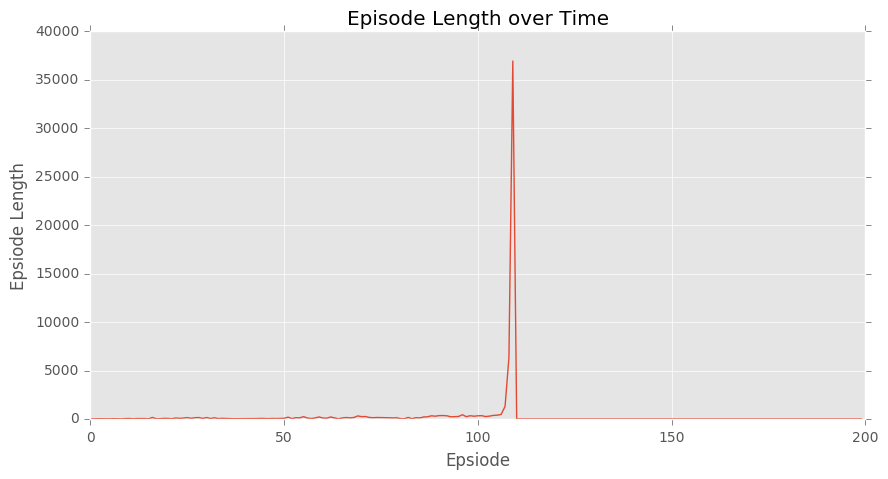

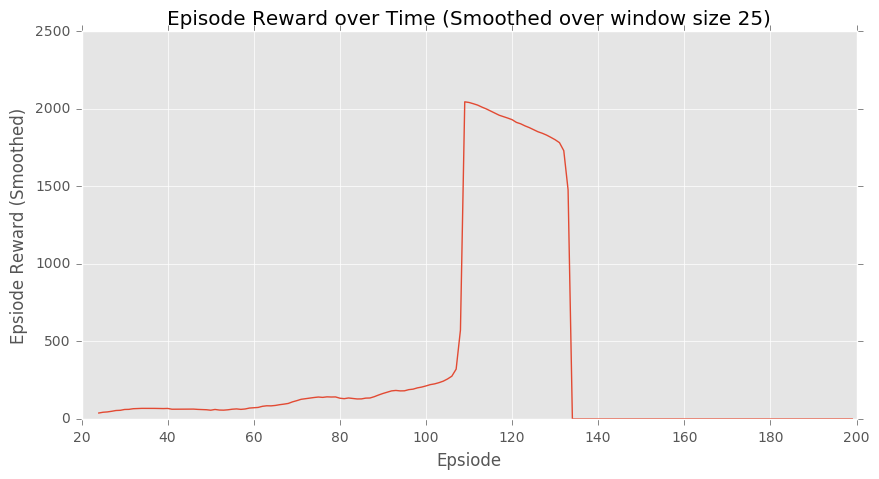

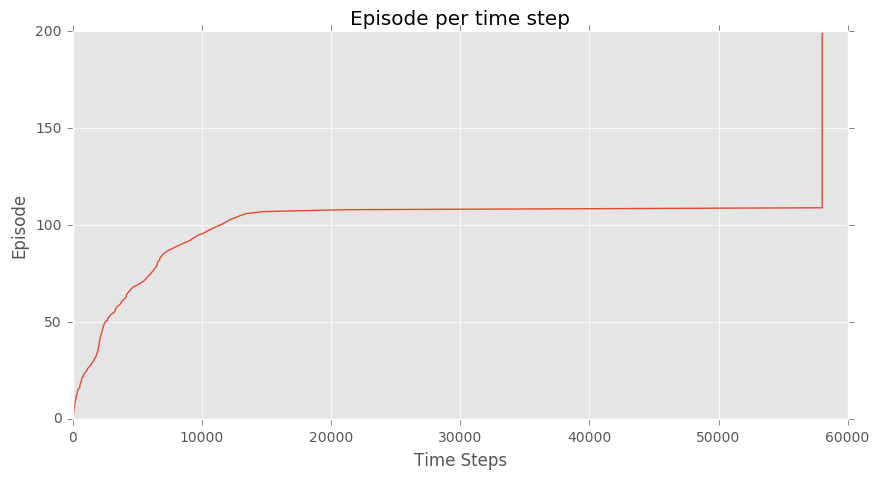

(<matplotlib.figure.Figure at 0x12c423208>,
 <matplotlib.figure.Figure at 0x12c7afb70>)

In [5]:
plotting.plot_episode_stats(stats, smoothing_window=25)